# **Trabalho Final de Softwares para Ciência de Dados 3 - Giovanni Riccardi Lourenzatto**
## **Análise dos dados de CNPJ de empresas de pequeno porte durante o período dos 2 últimos governos**

In [354]:
## bibliotecas
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


## melhorando visualização
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)


## **Carregando os dados das empresas de pequeno porte, eleições e número populacional por UF**
#### Os dados utilizados da tabela de cnpj vão de janeiro de 2015 até agosto de 2020
#### Os dados de eleição foram retirados do site do TSE
#### Os dados da população por UF, foi retirado da plataforma do IBGE

In [355]:
conexao = sqlite3.connect('amostra100pc.sqlite')

# Carrega os dados do CNPJ de empresas de pequeno porte e combinando com a tabela cnae
df_cnpj = pd.read_sql_query("SELECT * FROM cnpj_dados_cadastrais_pj as pj left join tab_cnae as cnae on pj.cnae_fiscal=cnae.cod_cnae where porte_empresa = '03' and situacao_cadastral in('08','02')", conexao)

In [356]:
df_cnpj.head(3)


,tipo_de_registro,indicador,tipo_atualizacao,cnpj,identificador_matriz_filial,razao_social,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,nm_cidade_exterior,cod_pais,nm_pais,codigo_natureza_juridica,data_inicio_atividade,cnae_fiscal,descricao_tipo_logradouro,logradouro,numero,complemento,bairro,cep,uf,codigo_municipio,municipio,ddd_telefone_1,ddd_telefone_2,ddd_fax,correio_eletronico,qualificacao_responsavel,capital_social_empresa,porte_empresa,opcao_pelo_simples,data_opcao_pelo_simples,data_exclusao_simples,opcao_pelo_mei,situacao_especial,data_situacao_especial,filler,fim_registro,cod_secao,nm_secao,cod_divisao,nm_divisao,cod_grupo,nm_grupo,cod_classe,nm_classe,cod_cnae,nm_cnae
0,1,F,,00000210000180,1,ESCOLA DE EDUCACAO INFANTIL INTERMUNDI LTDA,INTERMUNDI,02,2005-11-03,00,,,,2062,1994-07-12,8512100,PRACA,CENTENARIO,136,,CASA VERDE,02515040,SP,7107,SAO PAULO,,,,,49,0.0,03,5,2007-07-01,None,N,,None,,F,P,EDUCAÇÃO,85,EDUCAÇÃO,85.1,Educação infantil e ensino fundamental,85.12-1,Educação infantil - pré-escola,8512100,Educação infantil - pré-escola
1,1,F,,00000213000113,1,WAN INFORMATICA SERVICOS E COMERCIO LTDA,,08,2016-12-14,01,,,,2062,1994-07-21,4751201,RUA,CONEGO EUGENIO LEITE,631,CONJ. 34,PINHEIROS,05414011,SP,7107,SAO PAULO,011 31054011,,011 32425394,,49,0.0,03,0,None,None,N,,None,,F,G,COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS,47,COMÉRCIO VAREJISTA,47.5,Comércio varejista de equipamentos de informática e comunicação equipamentos e artigos de uso doméstico,47.51-2,Comércio varejista especializado de equipamentos e suprimentos de informática,4751201,Comércio varejista especializado de equipamentos e suprimentos de informática
2,1,F,,00000268000123,1,CFN PARTICIPACOES E INTERMEDIACOES LTDA,,02,2005-11-03,00,,,,2240,1994-08-01,7490104,RUA,HENRI BOUCHARD,127,APTO 4,JAGUARE,05319070,SP,7107,SAO PAULO,,,,,49,1000.0,03,0,None,None,N,,None,,F,M,ATIVIDADES PROFISSIONAIS CIENTÍFICAS E TÉCNICAS,74,OUTRAS ATIVIDADES PROFISSIONAIS CIENTÍFICAS E TÉCNICAS,74.9,Atividades profissionais científicas e técnicas não especificadas anteriormente,74.90-1,Atividades profissionais científicas e técnicas não especificadas anteriormente,7490104,Atividades de intermediação e agenciamento de serviços e negócios em geral exceto imobiliários


In [357]:
dfcandidatos2014 = pd.read_excel('eleicao2014.xlsx')
dfcandidatos2018 = pd.read_excel('eleicao2018.xlsx')
dfpopulacao = pd.read_excel('populacao.xlsx')

In [358]:
dfpopulacao.head(3)

,populacao,uf
0,1796460,RO
1,894470,AC
2,4207714,AM


In [359]:
dfcandidatos2014.shape, dfcandidatos2014.shape

((27, 58), (27, 58))

### selecionando os dados que seram utilizados durante o trabalho

In [360]:
## transformando as datas
df_cnpj['data_inicio_atividade'] = pd.to_datetime(df_cnpj['data_inicio_atividade'])
df_cnpj['data_situacao_cadastral'] = pd.to_datetime(df_cnpj['data_situacao_cadastral'])

In [361]:
## selecionando os dados das duas ultimas eleições
df_cnpj_eleicoes = df_cnpj[(df_cnpj['data_situacao_cadastral'] >= "2015-01-01")]

In [362]:
## dividindo o dataset em eleição de 2014 e 2018 para realizar o join 
df_cnpj_eleicoes2014 = df_cnpj_eleicoes[(df_cnpj_eleicoes['data_inicio_atividade'] >= "2015-01-01") & (df_cnpj_eleicoes['data_inicio_atividade'] < "2019-1-01") ]
df_cnpj_eleicoes2018 = df_cnpj_eleicoes[(df_cnpj_eleicoes['data_inicio_atividade'] >= "2019-01-01")]

In [363]:
df_cnpj_eleicoes2014.shape, df_cnpj_eleicoes2018.shape

((247518, 50), (118313, 50))

In [364]:
## selecionando as colunas dos arquivos de candidatos
dfcandidatos2014.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,DS_NACIONALIDADE,SG_UF_NASCIMENTO,CD_MUNICIPIO_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,NR_TITULO_ELEITORAL_CANDIDATO,CD_GENERO,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,NR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO
0,2018-10-26,15:56:28,2014,2,ELEIÇÃO ORDINÁRIA,2,144,Eleições Gerais 2014,2014-10-26,FEDERAL,AC,AC,ACRE,3,GOVERNADOR,10000000152,13,SEBASTIÃO AFONSO VIANA MACEDO NEVES,TIÃO VIANA,#NULO#,9137394215,#NULO#,12,APTO,2,DEFERIDO,COLIGAÇÃO,13,PT,PARTIDO DOS TRABALHADORES,10000000026,Frente Popular do Acre,PDT / PRB / PT / PSL / PTN / PSDC / PHS / PSB / PRP / PEN / PPL / PC do B / PROS / PTB,1,BRASILEIRA NATA,AC,-3,RIO BRANCO,1961-02-09,53,2288622410,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,274,GOVERNADOR,-1,1,ELEITO,S,S,53102014,2198920146010000
1,2018-10-26,15:56:28,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,2014-10-05,FEDERAL,AL,AL,ALAGOAS,3,GOVERNADOR,20000000202,15,JOSE RENAN VASCONCELOS CALHEIROS FILHO,RENAN FILHO,#NULO#,71014772168,RENANFILHO15@HOTMAIL.COM,12,APTO,2,DEFERIDO,COLIGAÇÃO,15,PMDB,PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO,20000000009,COM O POVO PRA ALAGOAS MUDAR,PV / PT do B / PMDB / PROS / PC do B / PSC / PHS / PTB / PSD / PDT / PT,1,BRASILEIRA NATA,AL,-3,MURICI,1979-10-08,35,24323961791,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,277,DEPUTADO,59000000,1,ELEITO,N,S,99072014,7557320146020000
2,2018-10-26,15:56:28,2014,2,ELEIÇÃO ORDINÁRIA,2,144,Eleições Gerais 2014,2014-10-26,FEDERAL,AM,AM,AMAZONAS,3,GOVERNADOR,40000000487,90,JOSÉ MELO DE OLIVEIRA,JOSÉ MELO,#NULO#,1182595200,PROFESSOR.MELO@BOL.COM.BR,12,APTO,2,DEFERIDO,COLIGAÇÃO,90,PROS,PARTIDO REPUBLICANO DA ORDEM SOCIAL,40000000049,Fazendo Mais Por Nossa Gente,PROS / DEM / PSL / PTN / PSC / PR / PRTB / PHS / PTC / PV / PRP / PSDB / PEN / PSD / SD / PT do B,1,BRASILEIRA NATA,AM,-3,IPIXUNA,1946-09-26,68,705472208,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),3,PARDA,274,GOVERNADOR,-1,1,ELEITO,S,S,127812014,5318120146040000
3,2018-10-26,15:56:28,2014,2,ELEIÇÃO ORDINÁRIA,2,144,Eleições Gerais 2014,2014-10-26,FEDERAL,AP,AP,AMAPÁ,3,GOVERNADOR,30000000088,12,ANTÔNIO WALDEZ GÓES DA SILVA,WALDEZ,#NULO#,12617555291,WALDEZGOES@HOTMAIL.COM,12,APTO,16,DEFERIDO COM RECURSO,COLIGAÇÃO,12,PDT,PARTIDO DEMOCRÁTICO TRABALHISTA,30000000006,A FORÇA DO POVO,PP / PDT / PMDB,1,BRASILEIRA NATA,PA,-3,GURUPA,1961-10-29,53,25582550,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),3,PARDA,999,OUTROS,-1,1,ELEITO,N,S,66442014,4860720146030000
4,2018-10-26,15:56:28,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,2014-10-05,FEDERAL,BA,BA,BAHIA,3,GOVERNADOR,50000000401,13,RUI COSTA DOS SANTOS,RUI COSTA,#NULO#,23790997587,JURIDICO-RC@GMAILGROUPS.COM,12,APTO,2,DEFERIDO,COLIGAÇÃO,13,PT,PARTIDO DOS TRABALHADORES,50000000007,PRA BAHIA MUDAR MAIS,PT / PP / PSD / PDT / PR / PC do B / PTB / PMN,1,BRASILEIRA NATA,BA,-3,SALVADOR,1963-01-18,51,5915940558,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),3,PARDA,277,DEPUTADO,65000000,1,ELEITO,N,S,365172014,3011220146050000


### As colunas escolhidas do dataset foram : 
#### SG_UF : responsável pelo join dos estados
#### NM_URNA_CANDIDATO : nome do candidato
#### SG_PARTIDO : Sigla do partido
#### NR_IDADE_DATA_POSSE : idade de quando tomou posse
#### DS_GENERO : Sexo

In [365]:
## selecionando as colunas
dfcandidatos2014 = dfcandidatos2014[['SG_UF','NM_URNA_CANDIDATO','SG_PARTIDO','NR_IDADE_DATA_POSSE','DS_GENERO']]
dfcandidatos2018 = dfcandidatos2018[['SG_UF','NM_URNA_CANDIDATO','SG_PARTIDO','NR_IDADE_DATA_POSSE','DS_GENERO']]

In [366]:
dfcandidatos2014.shape,dfcandidatos2018.shape

((27, 5), (27, 5))

In [367]:
## realizando o join 
df_cnpj_eleicoes2014 = df_cnpj_eleicoes2014.merge(dfcandidatos2014,left_on='uf', right_on='SG_UF',how='left')
df_cnpj_eleicoes2018 = df_cnpj_eleicoes2018.merge(dfcandidatos2018,left_on='uf', right_on='SG_UF',how='left')

In [368]:
df_cnpj_eleicoes2014.shape,df_cnpj_eleicoes2018.shape

((247518, 55), (118313, 55))

In [369]:
## concatenando as tabelas
df_cnpj_full = pd.concat([df_cnpj_eleicoes2014, df_cnpj_eleicoes2018])

In [370]:
## adicionando a população por UF
df_cnpj_full = df_cnpj_full.merge(dfpopulacao,left_on='uf', right_on='uf',how='left')

In [371]:
## limpando variáveis para desafogar a memória
del df_cnpj_eleicoes2014
del df_cnpj_eleicoes2018

In [372]:
print(df_cnpj_full.shape)
df_cnpj_full.head()

(365831, 56)


,tipo_de_registro,indicador,tipo_atualizacao,cnpj,identificador_matriz_filial,razao_social,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,nm_cidade_exterior,cod_pais,nm_pais,codigo_natureza_juridica,data_inicio_atividade,cnae_fiscal,descricao_tipo_logradouro,logradouro,numero,complemento,bairro,cep,uf,codigo_municipio,municipio,ddd_telefone_1,ddd_telefone_2,ddd_fax,correio_eletronico,qualificacao_responsavel,capital_social_empresa,porte_empresa,opcao_pelo_simples,data_opcao_pelo_simples,data_exclusao_simples,opcao_pelo_mei,situacao_especial,data_situacao_especial,filler,fim_registro,cod_secao,nm_secao,cod_divisao,nm_divisao,cod_grupo,nm_grupo,cod_classe,nm_classe,cod_cnae,nm_cnae,SG_UF,NM_URNA_CANDIDATO,SG_PARTIDO,NR_IDADE_DATA_POSSE,DS_GENERO,populacao
0,1,F,,00004298000299,2,SOLAR BRAUNA PRODUTOS QUIMICOS LTDA,,02,2017-09-29,00,,,,2062,2017-09-29,2062200,RUA,DR MACHADO,10,B,CENTRO,16290000,SP,6255,BRAUNA,18 36921510,,,FINANCEIRO@SOLARBRAUNA.COM.BR,49,0.0,03,0,None,None,,,None,,F,C,INDÚSTRIAS DE TRANSFORMAÇÃO,20,FABRICAÇÃO DE PRODUTOS QUÍMICOS,20.6,Fabricação de sabões detergentes produtos de limpeza cosméticos produtos de perfumaria e de higiene pessoal,20.62-2,Fabricação de produtos de limpeza e polimento,2062200,Fabricação de produtos de limpeza e polimento,SP,GERALDO ALCKMIN,PSDB,62.0,MASCULINO,46289333.0
1,1,F,,00007449000343,2,FABIANA RUGA COSMETICOS EIRELI,,02,2016-09-22,00,,,,2305,2016-09-22,4772500,RUA,HAROLDO NOGUEIRA TORTORELLI,39,LETRA A,SANTO ANTONIO,13770000,SP,6275,CACONDE,19 36331850,,,RUGA.RUGA@UOL.COM.BR,65,0.0,03,6,2007-07-01,2017-11-30,,,None,,F,G,COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS,47,COMÉRCIO VAREJISTA,47.7,Comércio varejista de produtos farmacêuticos perfumaria e cosméticos e artigos médicos ópticos e ortopédicos,47.72-5,Comércio varejista de cosméticos produtos de perfumaria e de higiene pessoal,4772500,Comércio varejista de cosméticos produtos de perfumaria e de higiene pessoal,SP,GERALDO ALCKMIN,PSDB,62.0,MASCULINO,46289333.0
2,1,F,,00007449000424,2,FABIANA RUGA COSMETICOS EIRELI,,02,2016-12-07,00,,,,2305,2016-12-07,4772500,RUA,FRANCISQUINHO DIAS,584,,CENTRO,13720000,SP,7095,SAO JOSE DO RIO PARDO,19 36088395,,,RUGA.RUGA@UOL.COM.BR,65,0.0,03,6,2007-07-01,2017-11-30,,,None,,F,G,COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS,47,COMÉRCIO VAREJISTA,47.7,Comércio varejista de produtos farmacêuticos perfumaria e cosméticos e artigos médicos ópticos e ortopédicos,47.72-5,Comércio varejista de cosméticos produtos de perfumaria e de higiene pessoal,4772500,Comércio varejista de cosméticos produtos de perfumaria e de higiene pessoal,SP,GERALDO ALCKMIN,PSDB,62.0,MASCULINO,46289333.0
3,1,F,,00007449000505,2,FABIANA RUGA COSMETICOS EIRELI,,02,2016-12-07,00,,,,2305,2016-12-07,4772500,AVENIDA,DEPUTADO EDUARDO VICENTE NASSER,700,LETRA B BOX 2,CENTRO,13720000,SP,7095,SAO JOSE DO RIO PARDO,19 36331850,,,RUGA.RUGA@UOL.COM.BR,65,0.0,03,6,2007-07-01,2017-11-30,,,None,,F,G,COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS,47,COMÉRCIO VAREJISTA,47.7,Comércio varejista de produtos farmacêuticos perfumaria e cosméticos e artigos médicos ópticos e ortopédicos,47.72-5,Comércio varejista de cosméticos produtos de perfumaria e de higiene pessoal,4772500,Comércio varejista de cosméticos produtos de perfumaria e de higiene pessoal,SP,GERALDO ALCKMIN,PSDB,62.0,MASCULINO,46289333.0
4,1,F,,00008286000232,2,GIZ PROPAGANDA E MARKETING LTDA,*****,08,2018-02-23,01,,,,2062,2016-02-22,7311400,RUA,ANTONIO BENTO,141,,VILA MATHIAS,11075260,SP,7071,SANTOS,11 30787730,,,CARMEN@GIZ.COM.BR,49,0.0,03,0,None,None,,,None,,F,M,ATIVIDADES PROFISSIONAIS CIENTÍFICAS E TÉCNICAS,73,PUBLICIDADE E PESQUISA DE MERCADO,73.1,Publicidade,73.11-4,Agências de publicidade,7311400,Agências de publicidade,SP,GERALDO ALCKMIN,PSDB,62.0,MASCULINO,46289333.0


## Exploração dos dados

In [373]:
## verificando tipos
df_cnpj_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365831 entries, 0 to 365830
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   tipo_de_registro             365831 non-null  object        
 1   indicador                    365831 non-null  object        
 2   tipo_atualizacao             365831 non-null  object        
 3   cnpj                         365831 non-null  object        
 4   identificador_matriz_filial  365831 non-null  object        
 5   razao_social                 365831 non-null  object        
 6   nome_fantasia                365831 non-null  object        
 7   situacao_cadastral           365831 non-null  object        
 8   data_situacao_cadastral      365831 non-null  datetime64[ns]
 9   motivo_situacao_cadastral    365831 non-null  object        
 10  nm_cidade_exterior           365831 non-null  object        
 11  cod_pais                  

In [374]:
## verificando nulos
df_cnpj_full.isna().sum()

tipo_de_registro                    0
indicador                           0
tipo_atualizacao                    0
cnpj                                0
identificador_matriz_filial         0
razao_social                        0
nome_fantasia                       0
situacao_cadastral                  0
data_situacao_cadastral             0
motivo_situacao_cadastral           0
nm_cidade_exterior                  0
cod_pais                            0
nm_pais                             0
codigo_natureza_juridica            0
data_inicio_atividade               0
cnae_fiscal                         0
descricao_tipo_logradouro           0
logradouro                          0
numero                              0
complemento                         0
bairro                              0
cep                                 0
uf                                  0
codigo_municipio                    0
municipio                           0
ddd_telefone_1                      0
ddd_telefone

#### O código de detecção de nulos encontrou apenas algumas colunas com valores nulos. Como visto mais acima, utilizando o comando head(), existem mais colunas sem valores, possivelmente utilizando valores "", por isso não aparecendo no isna().sum()

In [375]:
## verificando os registros que não apresentam valores nas colunas SG_UF, NM_URNA_CANDIDATO, SG_PARTIDO, NR_IDADE_DATA_POSSE, DS_GENERO
df_cnpj_full[df_cnpj_full["SG_UF"].isna()]

,tipo_de_registro,indicador,tipo_atualizacao,cnpj,identificador_matriz_filial,razao_social,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,nm_cidade_exterior,cod_pais,nm_pais,codigo_natureza_juridica,data_inicio_atividade,cnae_fiscal,descricao_tipo_logradouro,logradouro,numero,complemento,bairro,cep,uf,codigo_municipio,municipio,ddd_telefone_1,ddd_telefone_2,ddd_fax,correio_eletronico,qualificacao_responsavel,capital_social_empresa,porte_empresa,opcao_pelo_simples,data_opcao_pelo_simples,data_exclusao_simples,opcao_pelo_mei,situacao_especial,data_situacao_especial,filler,fim_registro,cod_secao,nm_secao,cod_divisao,nm_divisao,cod_grupo,nm_grupo,cod_classe,nm_classe,cod_cnae,nm_cnae,SG_UF,NM_URNA_CANDIDATO,SG_PARTIDO,NR_IDADE_DATA_POSSE,DS_GENERO,populacao
4097,1,F,,03785119000296,2,"PROMAR GESTORA DE EVENTOS, COMUNICACAO E OBRAS LTDA",,02,2015-02-06,00,CIUDAD DEL ESTE,586,PARAGUAI,2062,2015-02-06,7311400,,RUA LUIS ALBERTO DEL PARANA C/ AVDA BERNARDINO CABALLERO,SN,,CIUDAD DEL ESTE,,EX,9707,EXTERIOR,,,,CONTATO@GRUPOMP.COM.BR,49,0.0,03,0,None,None,,,None,,F,M,ATIVIDADES PROFISSIONAIS CIENTÍFICAS E TÉCNICAS,73,PUBLICIDADE E PESQUISA DE MERCADO,73.1,Publicidade,73.11-4,Agências de publicidade,7311400,Agências de publicidade,NaN,NaN,NaN,NaN,NaN,NaN
8255,1,F,,06936070001295,2,PRONOVA AUTORIDADE DE REGISTRO EM CERTIFICACAO DIGITAL LTDA,,02,2015-06-01,00,ESTORIL,607,PORTUGAL,2062,2015-06-01,6319400,,AVENIDA AIDA,0,LOJA 211,CENTRO COMERC. ESTORIL GARDEN,,EX,9707,EXTERIOR,,,,MAURO@PRONOVA.COM.BR,49,0.0,03,0,None,None,,,None,,F,J,INFORMAÇÃO E COMUNICAÇÃO,63,ATIVIDADES DE PRESTAÇÃO DE SERVIÇOS DE INFORMAÇÃO,63.1,Tratamento de dados hospedagem na Internet e outras atividades relacionadas,63.19-4,Portais provedores de conteúdo e outros serviços de informação na Internet,6319400,Portais provedores de conteúdo e outros serviços de informação na Internet,NaN,NaN,NaN,NaN,NaN,NaN
9086,1,F,,07471441000200,2,L. D. S CONSTRUTORA CIVIL LTDA,,02,2019-05-14,00,BOSTON,249,ESTADOS UNIDOS,2062,2018-06-13,4120400,,BEACH ST,341,ZIP 02151-3132,REVERE,,EX,9707,EXTERIOR,,,,,49,0.0,03,6,2009-01-01,2015-12-31,,,None,,F,F,CONSTRUÇÃO,41,CONSTRUÇÃO DE EDIFÍCIOS,41.2,Construção de edifícios,41.20-4,Construção de edifícios,4120400,Construção de edifícios,NaN,NaN,NaN,NaN,NaN,NaN
47159,1,F,,22486945000289,2,COMPANHIA VALE DO RIO NEGRO NAVEGACAO LTDA,CVRN - VALE DO RIO NEGRO,02,2017-06-05,00,QUITO,239,EQUADOR,2062,2017-06-05,5021102,,AV COLON,E4105Y,ED SOLAMAR PISO 5 OF 505,9 DE OCTUBRE,,EX,9707,EXTERIOR,,,,ALAN.NARIMATSU@HOTMAIL.COM,49,0.0,03,5,2015-05-20,None,,,None,,F,H,TRANSPORTE ARMAZENAGEM E CORREIO,50,TRANSPORTE AQUAVIÁRIO,50.2,Transporte por navegação interior,50.21-1,Transporte por navegação interior de carga,5021102,Transporte por navegação interior de carga intermunicipal interestadual e internacional exceto travessia,NaN,NaN,NaN,NaN,NaN,NaN
248377,1,F,,02503909000350,2,GLOBAL IMPORTACAO E EXPORTACAO DE ARTIGOS ESPORTIVOS E ALIMENTICIOS LTDA,GLOBAL BUSINESS,02,2019-03-01,00,CIDADE BRAGA,607,PORTUGAL,2062,2019-03-01,4649499,,RUA LUIZ SOARES BARBOSA,03,ANDAR 13 APT 98,SAO VICTOR,,EX,9707,EXTERIOR,,,,ASSELFIS@ASSELFIS.COM.BR,49,0.0,03,0,None,None,,,None,,F,G,COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS,46,COMÉRCIO POR ATACADO EXCETO VEÍCULOS AUTOMOTORES E MOTOCICLETAS,46.4,Comércio atacadista de produtos de consumo não alimentar,46.49-4,Comércio atacadista de equipamentos e artigos de uso pessoal e doméstico não especificados anteriormente,4649499,Comércio atacadista de outros equipamentos e artigos de uso pessoal e doméstico não especificados anteriormente,NaN,NaN,NaN,NaN,NaN,NaN
255388,1,F,,18178945000830,2,SIC CERTIFICACAO DIGITAL LTDA,,08,2020-03-10,01,OVAR,607,PORTUGAL,2062,2019-01-07,8219999,,RUA DA ESTRADA NOVA,1425,,ESMORIZ,,EX,9707,EXTERIOR,,,,,49,0.0,03,5,2013-05-20,None,,,None,,F,N,ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEMENTARES,82,SERVIÇOS DE ESCRITÓRIO DE APOIO ADMINISTRATIVO E OUTROS SERVIÇOS PRE

#### As empresas que não não trouxeram os dados das tabelas de eleição, foram as que foram abertas do exterior, possuindo o valor EX na sua coluna uf. Esses registros seram retirados.

In [376]:
indexNames = df_cnpj_full[ df_cnpj_full['uf'] == 'EX' ].index
df_cnpj_full.drop(indexNames , inplace=True)

In [377]:
## verificando se os registros foram retirados
df_cnpj_full[df_cnpj_full["SG_UF"].isna()]

,tipo_de_registro,indicador,tipo_atualizacao,cnpj,identificador_matriz_filial,razao_social,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,nm_cidade_exterior,cod_pais,nm_pais,codigo_natureza_juridica,data_inicio_atividade,cnae_fiscal,descricao_tipo_logradouro,logradouro,numero,complemento,bairro,cep,uf,codigo_municipio,municipio,ddd_telefone_1,ddd_telefone_2,ddd_fax,correio_eletronico,qualificacao_responsavel,capital_social_empresa,porte_empresa,opcao_pelo_simples,data_opcao_pelo_simples,data_exclusao_simples,opcao_pelo_mei,situacao_especial,data_situacao_especial,filler,fim_registro,cod_secao,nm_secao,cod_divisao,nm_divisao,cod_grupo,nm_grupo,cod_classe,nm_classe,cod_cnae,nm_cnae,SG_UF,NM_URNA_CANDIDATO,SG_PARTIDO,NR_IDADE_DATA_POSSE,DS_GENERO,populacao


## **Análise**

### período completo mês e ano (empresas abertas e fechadas)

In [378]:
## criando colunas de mês e ano
df_cnpj_full["anoMesAbertura"] = df_cnpj_full['data_inicio_atividade'].dt.to_period('M')
df_cnpj_full["anoAbertura"] = df_cnpj_full['data_inicio_atividade'].dt.year
df_cnpj_fechada = df_cnpj_full[df_cnpj_full['situacao_cadastral']=='08']
df_cnpj_fechada['anoMesFechamento'] = df_cnpj_fechada['data_situacao_cadastral'].dt.to_period('M')
df_cnpj_fechada['anoFechamento'] =  df_cnpj_fechada['data_situacao_cadastral'].dt.year
# df_cnpj_full[df_cnpj_full['situacao_cadastral']=='08']["anoMesFechamento"] = df_cnpj_full[df_cnpj_full['situacao_cadastral']=='08']['data_situacao_cadastral'].dt.to_period('M')
# df_cnpj_full[df_cnpj_full['situacao_cadastral']=='08']["anoFechamento"] = df_cnpj_full[df_cnpj_full['situacao_cadastral']=='08']['data_situacao_cadastral'].dt.year

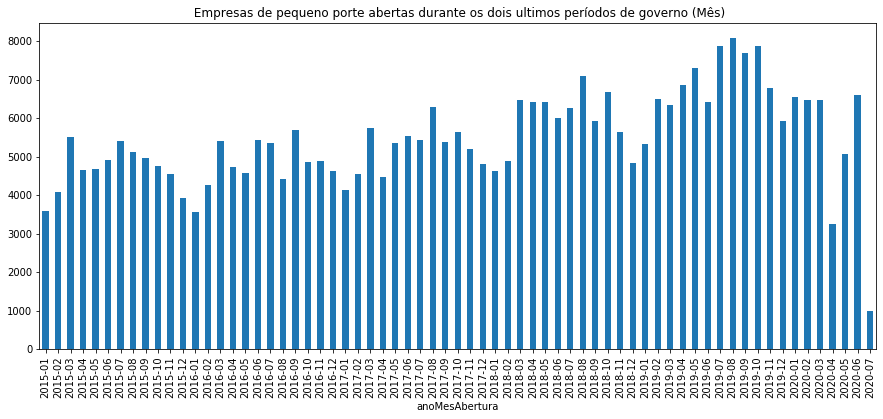

In [379]:
df_cnpj_full["anoMesAbertura"].groupby(df_cnpj_full["anoMesAbertura"]).agg('count').plot(kind="bar",
                                                                                         figsize = (15,6),
                                                                                         title = " Empresas de pequeno porte abertas durante os dois ultimos períodos de governo (Mês)")


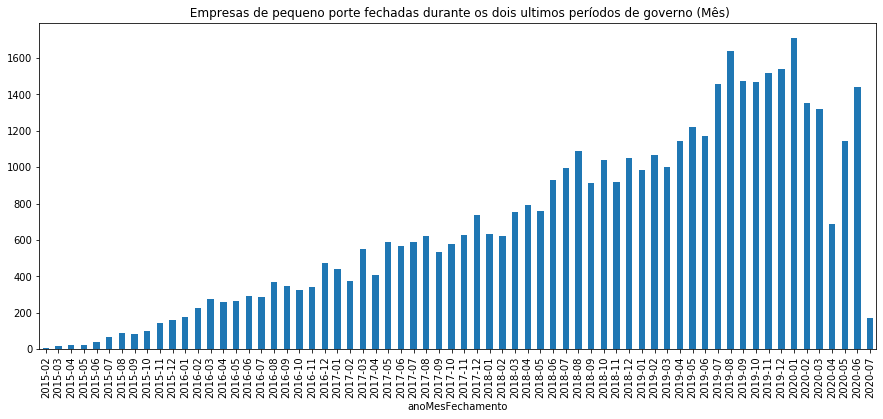

In [380]:
df_cnpj_fechada["anoMesFechamento"].groupby(df_cnpj_fechada["anoMesFechamento"]).agg('count').plot(kind="bar",
                                                                                         figsize = (15,6),
                                                                                         title = " Empresas de pequeno porte fechadas durante os dois ultimos períodos de governo (Mês)")

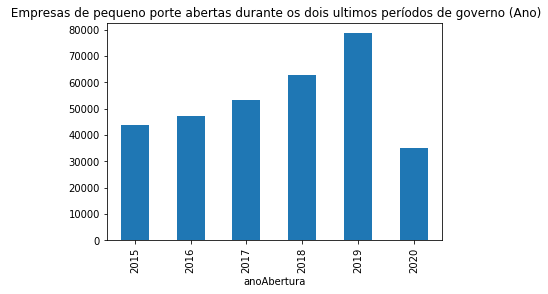

In [381]:
df_cnpj_full[df_cnpj_full["situacao_cadastral"] == '02']["anoAbertura"].groupby(df_cnpj_full["anoAbertura"]).agg('count').plot(kind="bar",
                                                                                   figsize = (6,4),
                                                                                   title = " Empresas de pequeno porte abertas durante os dois ultimos períodos de governo (Ano)")


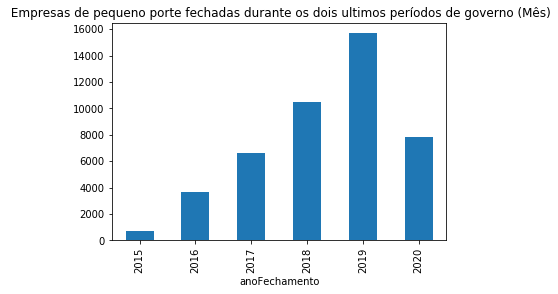

In [382]:
df_cnpj_fechada["anoFechamento"].groupby(df_cnpj_fechada["anoFechamento"]).agg('count').plot(kind="bar",
                                                                                         figsize = (6,4),
                                                                                         title = " Empresas de pequeno porte fechadas durante os dois ultimos períodos de governo (Mês)")

#### Empresas Abertas :
#### olhando o gráfico, é possível observar um ligeiro aumento na quantidade de empresas de pequeno porte que abriram com o passar dos anos. Já no primeiro ano de governo, comparando os anos de 2015 com 2019, o ano de 2019 desponta com a maior quantidade de empresas abertas, isso mesmo se for comparado com os demais anos presentes.
#### Empresas Fechadas :
#### Observando o gráfico geral, é possível ver um expressivo aumento de empresas fechadas com o passar dos anos, atingindo seu ápice em 2019.


## **Governadores e seus partidos**

In [383]:
## agrupando governadores por uf e contando
agrupando2014 = df_cnpj_full[(df_cnpj_full['data_inicio_atividade'] >= "2015-01-01") & (df_cnpj_full['data_inicio_atividade'] < "2019-1-01") ][["NM_URNA_CANDIDATO","uf",'SG_PARTIDO']].groupby(["NM_URNA_CANDIDATO",'uf','SG_PARTIDO']).NM_URNA_CANDIDATO.agg('count')
agrupando2018 = df_cnpj_full[(df_cnpj_full['data_inicio_atividade'] >= "2019-01-01")][["NM_URNA_CANDIDATO","uf",'SG_PARTIDO']].groupby(["NM_URNA_CANDIDATO",'uf','SG_PARTIDO']).NM_URNA_CANDIDATO.agg('count')
## transformando as chaves e quantidade em lista, para depois juntar em um dataset
dfgovernadoragrupado2014 = pd.DataFrame(agrupando2014.keys().to_list(),columns=['nome','uf','SG_PARTIDO'])
dfgovernadoragrupado2014['quantidade'] = agrupando2014.to_list()
dfgovernadoragrupado2018 = pd.DataFrame(agrupando2018.keys().to_list(),columns=['nome','uf','SG_PARTIDO'])
dfgovernadoragrupado2018['quantidade'] = agrupando2018.to_list()
## juntando com a população e criando métrica de empresas abertas/população da UF
governadorUfPopulacao2014 = dfgovernadoragrupado2014.merge(dfpopulacao.sort_values(by=['populacao'],ascending=False),left_on='uf', right_on='uf',how='left')
governadorUfPopulacao2014['aberto/populacao'] = governadorUfPopulacao2014['quantidade']/governadorUfPopulacao2014['populacao']
governadorUfPopulacao2018 = dfgovernadoragrupado2018.merge(dfpopulacao.sort_values(by=['populacao'],ascending=False),left_on='uf', right_on='uf',how='left')
governadorUfPopulacao2018['aberto/populacao'] = governadorUfPopulacao2018['quantidade']/governadorUfPopulacao2018['populacao']


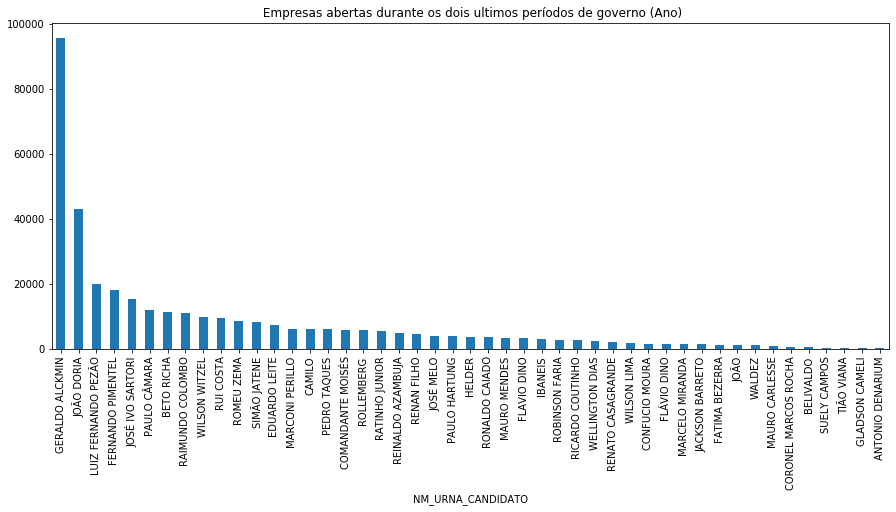

In [384]:
##governadores
df_cnpj_full["NM_URNA_CANDIDATO"].groupby(df_cnpj_full["NM_URNA_CANDIDATO"]).agg('count').nlargest(100).plot(kind="bar",
                                                                                    figsize = (15,6),
                                                                                    title = " Empresas abertas durante os dois ultimos períodos de governo (Ano)")

#### Em números absolutos, os governadores de onde mais abriram empresas são os das UF com maior quantidade de população. Para uma melhor visualização, será feito uma separação do ano da posse, pois só existe dados até agosto de 2020, e seus respectivos números levando em conta a métrica de empresas abertas/população.

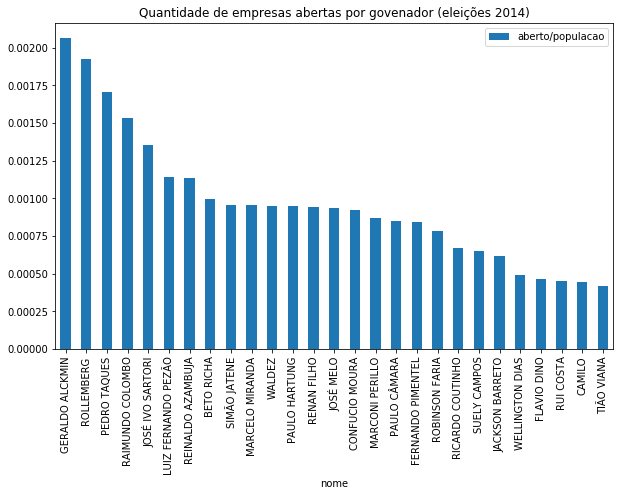

In [385]:
##governadores
governadorUfPopulacao2014.sort_values(by=['aberto/populacao'],ascending=False).plot(x='nome',y='aberto/populacao',kind="bar",figsize = (10,6),title = "Quantidade de empresas abertas por govenador (eleições 2014)")

#### Após aplicação da métrica, é possível observar que a diferença entre os governadores que era bem grande, diminuiu. Geraldo Alckmin ainda é o primeiro colocado na lista, mas seguindo ele aparece Rollemberg (DF) e Pedro Taques (MT), demonstrando que embora a população do estado desses governadores correspondam a cerca de 1,4% (20º ranking de população) e 1,7% (17º ranking de população) respectivamente, proporcionalmente no período de seu governo abriram mais empresas que a maioria dos outros governadores.
#### Fernando Pimental (MG) e Luiz Fernando Pezão (RJ) que gorvernaram respectivamente a 2º e 3º UF mais populosas, aparecem mais atrás nas lista, com Fernando figurando na 18º posição e Pezão em 6º.
#### é importante avaliar as estratégias utilizadas principalmente por Rollembrg e Pedro Taques, que embora fossem governadores de regiões menos populosas, alcançaram uma ótima posição no ranking de abertura e empresas. 
#### *Em 2017 Rollemberg facilitou o registro e licenciamento de empresas, permitindo que a abertura de negócios ocorra em até minutos.
#### *Com Pedro Taques foi implementado a Lei Geral da Micro e Pequena Empresa, tirando essas empresas da informalidade, e fornecendo menor quantidade de impostos para os empresários.

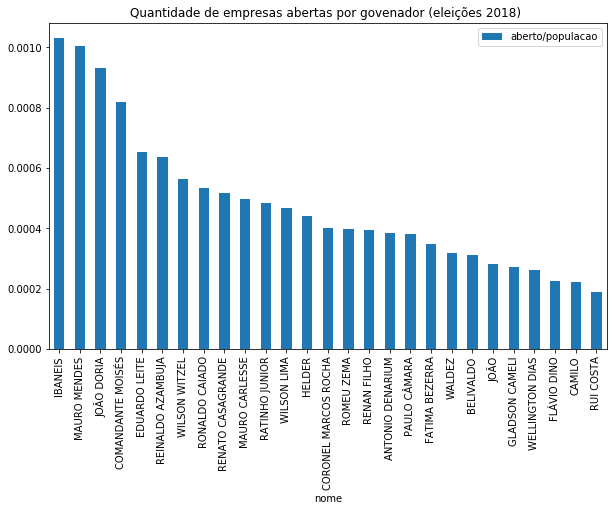

In [386]:
##governadores
governadorUfPopulacao2018.sort_values(by=['aberto/populacao'],ascending=False).plot(x='nome',y='aberto/populacao',kind="bar",figsize = (10,6),title = "Quantidade de empresas abertas por govenador (eleições 2018) ")

#### Visualizando o gráfico em sua versão pós eleição de 2018, algumas alterações aparecem. O governador de SP, João Doria, aparece na 3º posição, fazendo SP perder o posto da primeira colocação. Agora Ibaneis (DF) lidera entre os governadores das UF que proporcionalmente mais abiram empresas, seguido por Mauro Mendes (MT). Essa troca de posição demonstra que DF e MT continuam bem, ganhando 1 posição cada.
#### Reinaldo Azambuja (MS) que foi reeleito também subiu uma posição, passando Witzel (RJ), demonstrando que após a eleição de 2018, RJ não manteu sua quantidade de empresas abertas.
#### O Acre que se encontrava na última posição com Tião Costa após a eleição de 2014, depois da última eleição subiu 4 posições com Gladson Cameli no poder, já a Bahia que estava na terceira pior colocação, com Rui Costa, foi para a ultima posição após sua reeleição.

#### *Gladison Cameli simplificou o processo de abertura de empresas no dia 16/03/2020

In [387]:
## população
# dfpopulacao.sort_values(by=['populacao'],ascending=False).plot(kind="bar",
#                  x="uf",
#                  figsize = (20,8),
#                  title = " População por UF")
# plt.ticklabel_format(style='plain', axis='y')


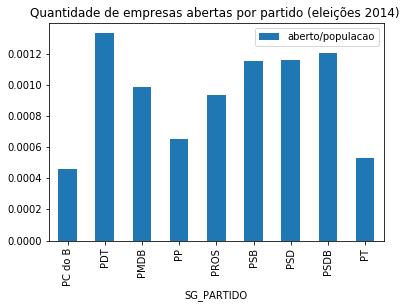

In [388]:
## partidos
governadorUfPopulacao2014[['SG_PARTIDO','aberto/populacao']].groupby(["SG_PARTIDO"]).agg('mean').plot(kind='bar', title='Quantidade de empresas abertas por partido (eleições 2014) ')

#### durante o governo dos eleitos nas eleições de 2014, PT e PC do B foram os partidos que tiveram proporcionalmente menos empresas abertas. o PC do B com 1 governador (MA) e o PT com 5 (AC,CE,BA,MG,PI), de todos esses estados, apenas MG e AC não se encontra no nordeste, demonstrando uma preferência do público nordestino por partidos voltados mais a esquerda.
#### já na outra ponta se destacam o PDT e o PSB. O PDT com 2 governadores (AP,MG) e o PSDB com 5 (GO,MS,PA,PR,SP).

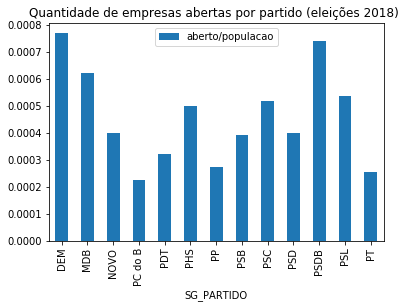

In [389]:
## partidos
governadorUfPopulacao2018[['SG_PARTIDO','aberto/populacao']].groupby(["SG_PARTIDO"]).agg('mean').plot(kind='bar',title = 'Quantidade de empresas abertas por partido (eleições 2018) ')

#### Já após as eleições de 2018, os dois partidos que mais se destacam são o DEM e o PSDB. o DEM com 2 governadores (GO,MT), e o PSDB com 3 (MS,RS,SP). O PSDB por sua vez com uma quantidade inferior de governadores, comparado a eleição anterior.
#### Na parte de baixo do gráfico, assim como em 2014, PT e PC do B continuam como os piores partidos, seguidos logo de perto pelo PP. Dessa vez todos os os governadores do PT e PC do B são da região nordeste.
#### Após observar os dois gráficos é possível observar que a região nordeste é a que possui mais dificuldade em abrir novas empresas, proporcionalmente falando, isso demonstra que os governadores dessa região, tendem a investir mais em outras áreas, o que acaba por não atrair muitas empresas de pequeno porte.

## Tipos de Empresas

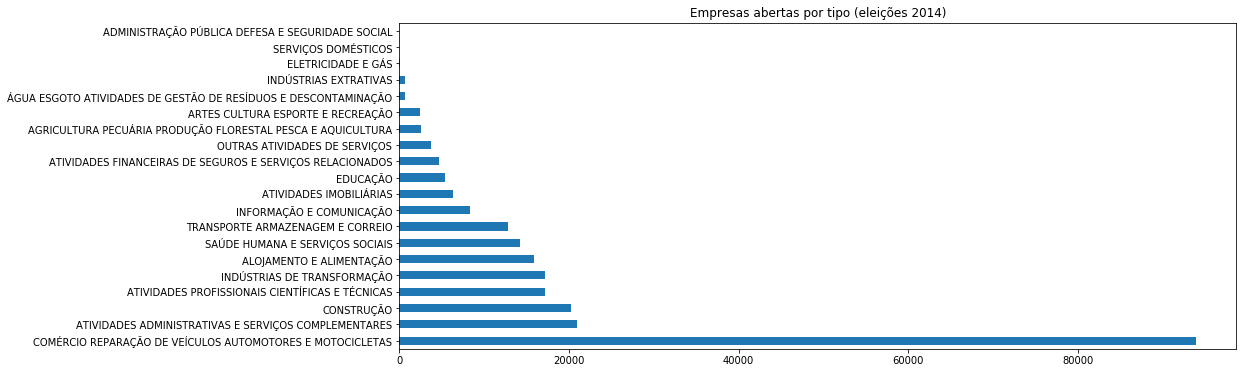

In [390]:
df_cnpj_full[(df_cnpj_full['data_inicio_atividade'] >= "2015-01-01") & (df_cnpj_full['data_inicio_atividade'] < "2019-1-01") ].nm_secao.value_counts().plot(kind='barh'
                                                                                                                                                            ,figsize = (15,6),
                                                                                                                                                            title='Empresas abertas por tipo (eleições 2014)')

#### Durante o período dos governantes eleitos em 2014, o tipo de empresas que mais abriram foram :
#### * Comércio reparação de veículos automotores e motocicletas.
#### * Atividades administrativas e serviços complementares.
#### * Construção.
#### * Atividades profissionais científicas e técnicas.
#### * Indústrias de transformação.

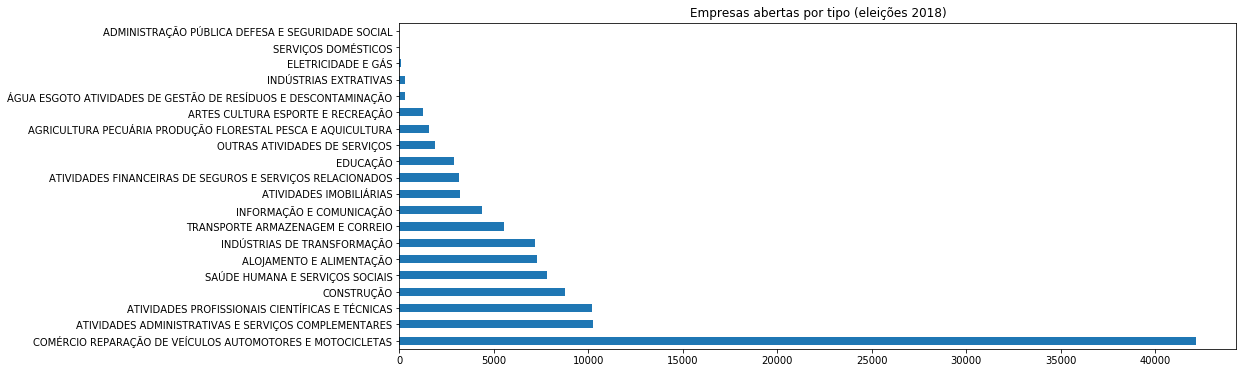

In [391]:
df_cnpj_full[(df_cnpj_full['data_inicio_atividade'] >= "2019-01-01")].nm_secao.value_counts().plot(kind='barh',figsize = (15,6),title='Empresas abertas por tipo (eleições 2018)')

#### Durante o período dos governantes eleitos em 2018, o tipo de empresas que mais abriram foram :
#### * Comércio reparação de veículos automotores e motocicletas.
#### * Atividades administrativas e serviços complementares.
#### * Atividades profissionais científicas e técnicas.
#### * Construção.
#### * Saúde humana e serviços sociais.

## Comparando os períodos.
#### * Entre 2019-2020, Atividades profissionais científicas e técnicas e Saúde humana e serviços sociais subiram posições no gráfico. Esse resultado pode ser consequência da pandêmia que tomou conta do país em março de 2020, exigindo mais da área científica e da saúde.
#### * Já Comércio reparação de veículos automotores e motocicletas lidera com grande diferença nos dois períodos.

## **Análise dos tipos de empresas, levando em consideração os governadores que mais se destacaram** 

### Janeiro 2015 - Dezembro 2018

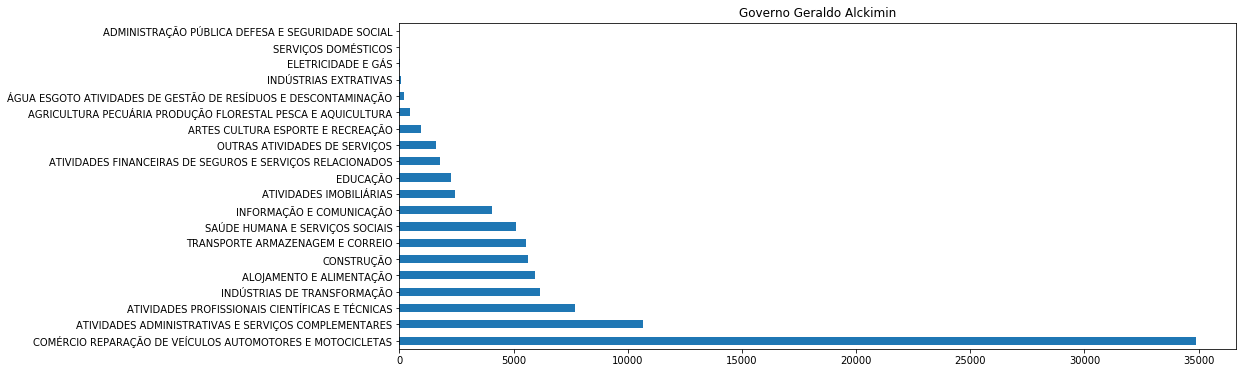

In [392]:
df_cnpj_full[(df_cnpj_full['data_inicio_atividade'] >= "2015-01-01") & (df_cnpj_full['data_inicio_atividade'] < "2019-1-01")
           & (df_cnpj_full['NM_URNA_CANDIDATO'] == "GERALDO ALCKMIN")  ].nm_secao.value_counts().plot(kind='barh'
                                                                                                    ,figsize = (15,6),
                                                                                                    title='Governo Geraldo Alckimin')

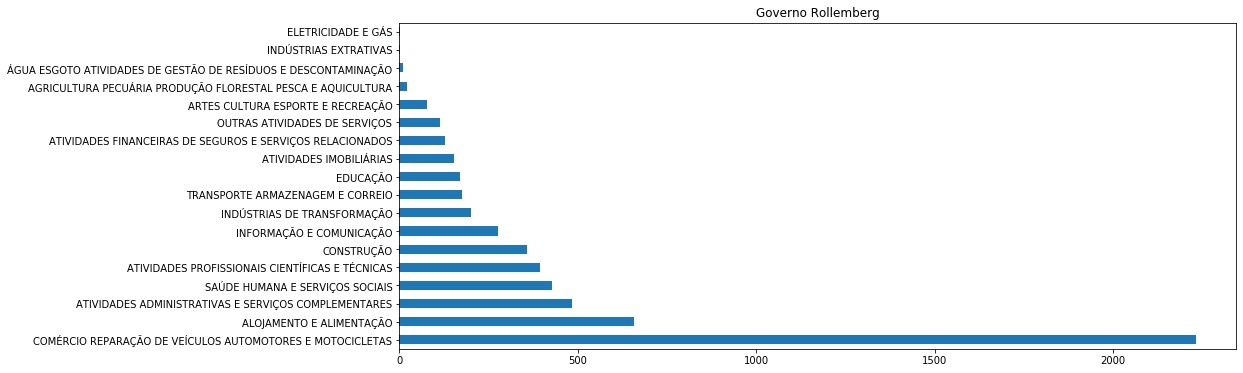

In [393]:
df_cnpj_full[(df_cnpj_full['data_inicio_atividade'] >= "2015-01-01") & (df_cnpj_full['data_inicio_atividade'] < "2019-1-01")
           & (df_cnpj_full['NM_URNA_CANDIDATO'] == "ROLLEMBERG")  ].nm_secao.value_counts().plot(kind='barh'
                                                                                                    ,figsize = (15,6),
                                                                                                    title='Governo Rollemberg')

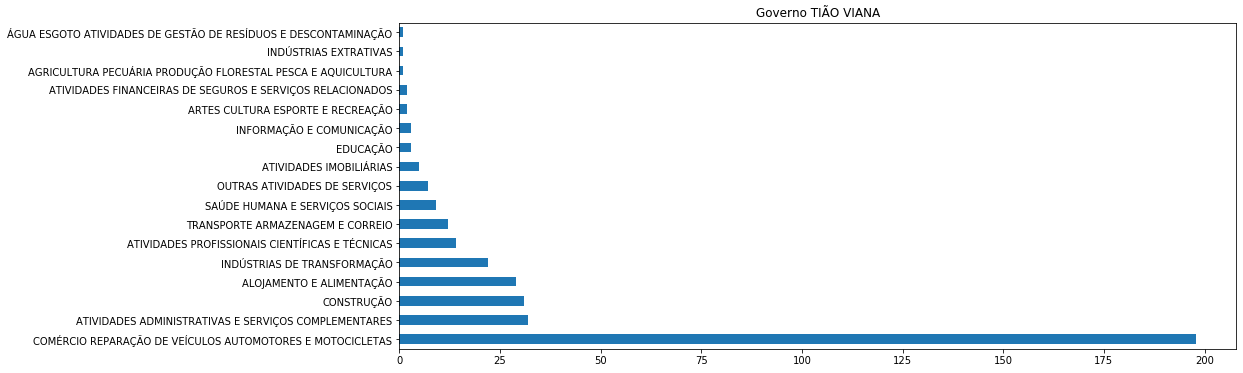

In [394]:
df_cnpj_full[(df_cnpj_full['data_inicio_atividade'] >= "2015-01-01") & (df_cnpj_full['data_inicio_atividade'] < "2019-1-01")
           & (df_cnpj_full['NM_URNA_CANDIDATO'] == "TIÃO VIANA")  ].nm_secao.value_counts().plot(kind='barh',
                                                                                                    figsize = (15,6),
                                                                                                    title='Governo TIÃO VIANA')

### Janeiro 2019 - Agosto 2020